
# ZOMATO DATABASE

# 1. Business Problem

# 1.1 Description

<p>zomato is a platform for online food orders Across the country. Zomato provides information, menus, and user-reviews of restaurants as well as food delivery options.
Daily millions of people order online food on Zomato.It is available in the various language i.e English, Turkish, polish, Indonesian, Spanish, Italian etc.Internet and mobile app are the only channel used for the whole process for customers to find a suitable restaurant with better discount deals and place an order
    </p>
  <h4> Problem Statement </h4>

  <ol>
        
<li> Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.</li>
<li>Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API       whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.</li>
<li>Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.</li>
<li>Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.</li>
<li>Number of Votes given Restaurant</li>
<li>Restaurant serving more number of cuisines.</li>
<li>Average Cost of Restaurant</li>
<li>Restaurant serving some specific cuisines.</li>
<li>Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?</li>
<li>Plot the bar graph top 15 restaurants have a maximum number of outlets.</li>
<li>Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).</li>
<li>Plot the bar graph top 10 restaurants in the data with the highest number of votes.</li>
<li>Plot the pie graph of top 10 cuisines present in restaurants in the USA.</li>
<li>Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.</li>
  </ol>
    



# 1.2 Source/Useful Links

<h4>Source</h4>
<a> https://mail.google.com/mail/u/1/#search/zomato/FMfcgxwKkRDpqbqjrzHsgbdTpQgftflh </a>

<h4> Other Useful Links </h4>
<a>https://www.digitalocean.com/community/tutorials/how-to-use-python-markdown-to-convert-markdown-text-to-html#:~:text=%20How%20To%20Use%20Python-Markdown%20to%20Convert%20Markdown,Data%20and%20Converting%20it%20to%20HTML.%20More%20 </a>
<a>https://rapidapi.com/blog/how-to-use-zomato-api/#:~:text=%20How%20to%20Connect%20to%20the%20Zomato%20API,apiKey%20input%20field%20&%20click%20%E2%80%9CSave%E2%80%9D.%20More </a>
<a> https://developers.zomato.com/api</a>
<a> https://datavizpyr.com/make-bubble-plot-in-python-with-matplotlib/</a>


# Exploratory Data Analysis

In [29]:
# Adding libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as m
import seaborn as sb
%matplotlib inline

<h3> Reading Dataset</h3>
<h5> ISO encoidng Used</h5>

In [ ]:
df = pd.read_csv('C:\\Users\\Mohit Agrawal\\Downloads\\archive (1)\\zomato.csv',encoding='ISO-8859-1')
df.head()

#  Basic PreProcessing for further Data Analysis

In [ ]:
df = df.rename(columns={"Price range":"price","Aggregate rating":"aggr_rating","Restaurant ID":"res_id","Restaurant Name":"res_name","Country Code":"country_code","Locality Verbose":"loc_verbose","Has Table booking":"table_booking","Has Online delivery":"online_delivery","Average Cost for two":"avg_cost","Switch to order menu":"switch_to_menu","Is delivering now":"delivery_status","Rating color":"color"})
df.head()

In [4]:
df = df.rename(columns={"Rating text":"rating"})

In [69]:
df.columns

Index(['res_id', 'res_name', 'country_code', 'City', 'Address', 'Locality',
       'loc_verbose', 'Longitude', 'Latitude', 'Cuisines', 'avg_cost',
       'Currency', 'table_booking', 'online_delivery', 'delivery_status',
       'switch_to_menu', 'price', 'aggr_rating', 'color', 'Rating text',
       'Votes'],
      dtype='object')

# PROBLEM -1

<h2>1.Number of restaurents in Delhi-NCR vs Rest Of India</h2>

<ipython-input-6-72df00cefa50>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.City[df['country_code']==1]=df.City[df['country_code']==1].apply(changeCity)


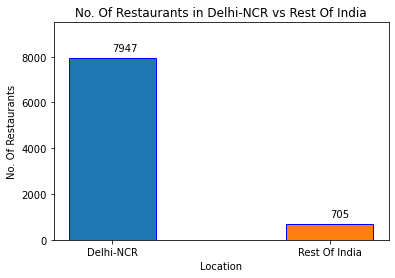

In [6]:
def changeCity(city):
    if(city=='New Delhi' or city=='Ghaziabad' or city=='Noida' or city=='Gurgaon' or city=='Faridabad'):
        return 'Delhi-NCR'
    else:
        return 'Rest_Of_India'

df.City[df['country_code']==1]=df.City[df['country_code']==1].apply(changeCity)
# Counting the restaurants having location Delhi-NCR
restaurants_delhi=df.City[df['City']=='Delhi-NCR'].count()
# Counting the restaurants having location Rest Of India
restaurants_other=df.City[df['City']=='Rest_Of_India'].count()
#plotting the graph
m.title('No. Of Restaurants in Delhi-NCR vs Rest Of India')
m.xlabel('Location')
m.ylabel('No. Of Restaurants')
m.bar(height=restaurants_delhi,x='Delhi-NCR',width=0.4,edgecolor='blue')
m.bar(height=restaurants_other,x='Rest Of India',width=0.4,edgecolor='blue')
m.text(x='Delhi-NCR', y=restaurants_delhi+300,s=restaurants_delhi)
m.text(x='Rest Of India',y=restaurants_other+300,s=restaurants_other)
m.ylim(0,9500)
m.show()

<h2> 2(a).Cuisines which are not present in Delhi-NCR but present in rest of india</h2>


In [21]:
#  Cuisines of Delhi-NCR
delhi_cuisines=df.Cuisines[df['City']=='Delhi-NCR']
#  Cuisines of Rest Of India
rest_cuisines=df.Cuisines[df['City']=='Rest_Of_India']
delhi_dict={}
# Cuisine Values are Comma seperated
for i in delhi_cuisines.values:
    # Making array of different values
    array=i.split(",")
    # Add Unique values to the dictionary 
    for ele in array:
        if ele.strip() in delhi_dict:
            delhi_dict[ele.strip()]+=1
        else:
            delhi_dict[ele.strip()]=1
rest_dict={}
# Doing the same procedure for Rest Of India
for i in rest_cuisines.values:
    array=i.strip().split(",")
    for ele in array:
        if ele in rest_dict:
            rest_dict[ele.strip()]+=1
        else:
            rest_dict[ele.strip()]=1
# Converting the keys of dictionary to a set
a1=delhi_dict.keys()
a2=rest_dict.keys()
a1=set(a1)
a2=set(a2)
# Taking difference Of sets to get cuisines not present in Delhi-NCR but in Rest Of India
print('Cuisines which are not present in Delhi-NCR but in Rest Of India according to the data-set')
final=(a2-a1)
print((final))

Cuisines which are not present in Delhi-NCR but in Rest Of India according to the data-set
{'Malwani', 'Cajun', 'German', 'BBQ'}


<h2>2(b).Cuisines which are not present in Delhi-NCR but in rest of india according to zomato-API</h2>

In [22]:
import requests as req #requests import for get requests from API 
# Required Header to be passed in the get request (Accn to the documentation)
h={
    'Accept':'application/json',
    'user-key':'d6db71e55864f2c068b613f4528db4a4'
}
# Parameters
p={
    # City ID of Delhi-NCR is 1
    'city_id':1
}
# Get Request
res=req.get('https://developers.zomato.com/api/v2.1/cuisines',headers=h,params=p)
data=res.json()
api_cuisine_array=[]
# Creating the cuisine array from receieved data 

for i in data['cuisines']:
    api_cuisine_array.append(i['cuisine']['cuisine_name'])
print('Cuisines which are not present in Delhi-NCR but in Rest Of India according to Zomato API')
api_cuisine_array=set(api_cuisine_array)
#print(set(list(set(final)-api_cuisine_array.intersection(set(final)))))
print(api_cuisine_array.intersection(set(final)))

Cuisines which are not present in Delhi-NCR but in Rest Of India according to Zomato API
{'Malwani', 'BBQ'}


<h2>3.Top 10 Cuisines served by maximum Number of restaurents in delhi vs india</h2>

In [ ]:
max_delhi=sorted(delhi_dict,key=delhi_dict.get,reverse=True)
max_delhi

In [34]:
arr=[]
arr2=[]
val1=[]
for i in range(10):
    
    #arr=str(arr)
    #arr = max_rest[i]
    val1.append(max_delhi[i])
    arr2.append(delhi_dict[max_delhi[i]])
    # print(max_rest[i],rest_dict[max_rest[i]])
    
    
    
    

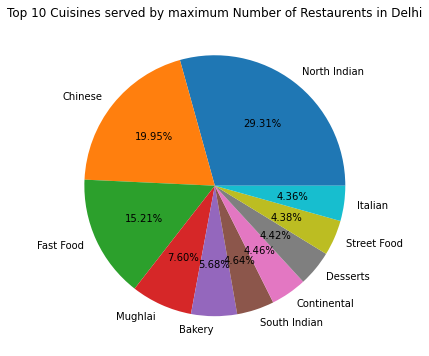

In [39]:

m.figure(figsize=(12,6))
m.pie(arr2,labels=val1,autopct='%0.2f%%')
m.title("Top 10 Cuisines served by maximum Number of Restaurents in Delhi")
m.show()

In [ ]:

print("Top 10 cuisines served by maximum number of restaurents in delhi")
for i in range(10):
    print(max_delhi[i],delhi_dict[max_delhi[i]])
    

In [ ]:
max_rest=sorted(rest_dict,key=rest_dict.get,reverse=True)
max_rest

In [42]:
arr=[]
arr1=[]
val=[]
for i in range(10):
    
    #arr=str(arr)
    #arr = max_rest[i]
    val.append(max_rest[i])
    arr1.append(rest_dict[max_rest[i]])
    # print(max_rest[i],rest_dict[max_rest[i]])
    
    
    
    

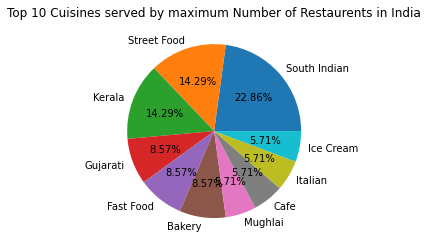

<Figure size 864x360 with 0 Axes>

In [44]:
#m.title("Top 10 Cuisines served by maximum Number of Restaurents in Delhi")

m.pie(arr1,labels=val,autopct='%0.2f%%')
m.title("Top 10 Cuisines served by maximum Number of Restaurents in India")
m.figure(figsize=(12,5))
m.show()

<h2> 4.Analysis of how cuisine served is different from Delhi NCR to Rest of India.</h2>

<AxesSubplot:xlabel='table_booking', ylabel='count'>

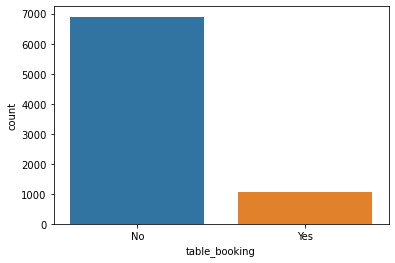

In [45]:
cuisines_served_delhi =sb.countplot(x =df['table_booking'][df['City']=='Delhi-NCR'])
cuisines_served_delhi

<AxesSubplot:xlabel='table_booking', ylabel='count'>

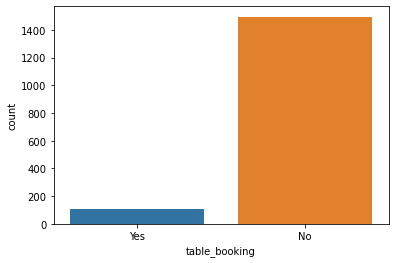

In [46]:
cuisines_served_delhi =sb.countplot(x =df['table_booking'][df['City']!='Delhi-NCR'])
cuisines_served_delhi

<AxesSubplot:xlabel='online_delivery', ylabel='count'>

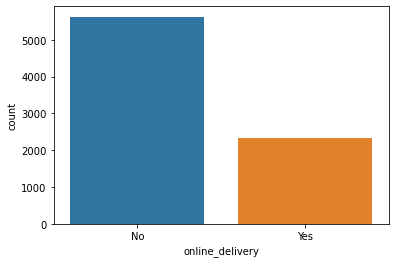

In [47]:
cuisines_served_delhi =sb.countplot(x =df['online_delivery'][df['City']=='Delhi-NCR'])
cuisines_served_delhi

<AxesSubplot:xlabel='online_delivery', ylabel='count'>

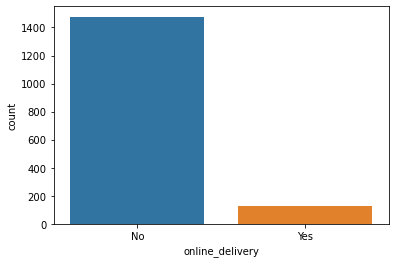

In [48]:
cuisines_served_delhi =sb.countplot(x =df['online_delivery'][df['City']!='Delhi-NCR'])
cuisines_served_delhi

# PROBLEM-2

# 1.maximum no. of votes given restaurent

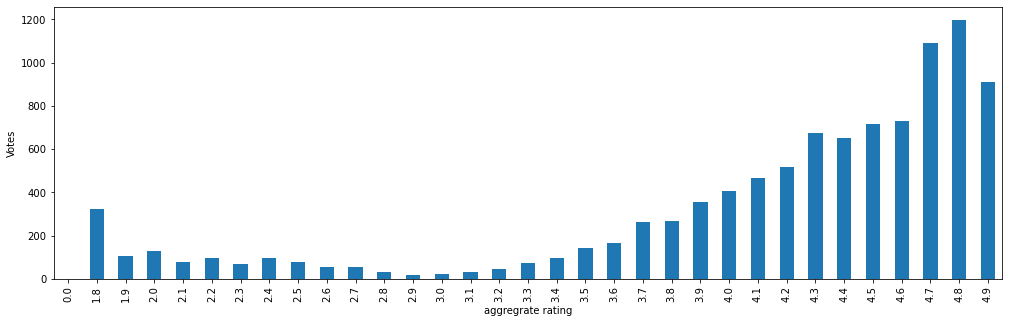

In [49]:

df.groupby('aggr_rating')['Votes'].mean().plot(kind='bar',figsize=(17,5))
m.xlabel('aggregrate rating')
m.ylabel('Votes') 
m.show()

# 2.Restaurent serving more Number of cuisines

In [50]:
#count cuisines
def count_cuisine(string):
    array=str(string).split(',')
    return len(array)

In [51]:
df['No._Of_Cuisine']=df['Cuisines'].apply(count_cuisine)

<BarContainer object of 9551 artists>

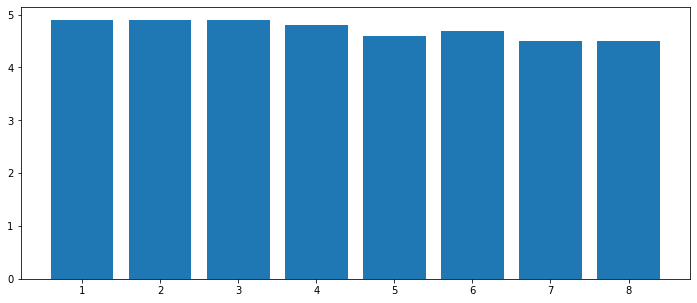

In [52]:
m.figure(figsize=(12,5))
m.bar(height=df['aggr_rating'],x=df['No._Of_Cuisine'])

#  3.How avg_cost is affected by aggregrate rating 

<Figure size 432x288 with 0 Axes>

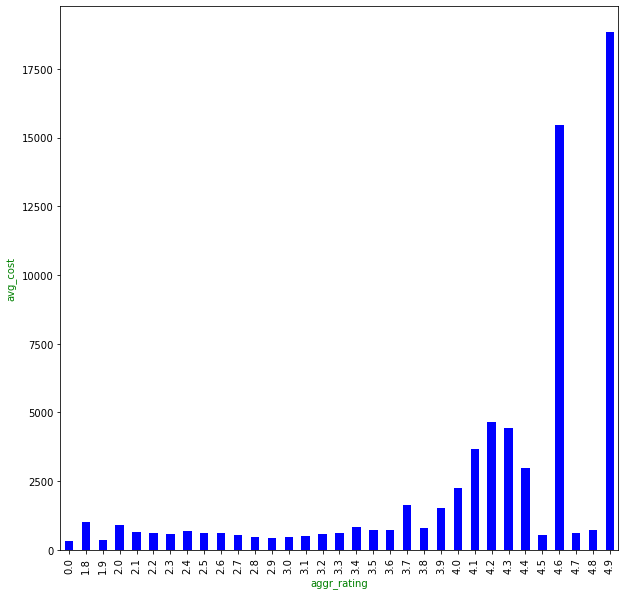

<Figure size 432x288 with 0 Axes>

In [53]:
df.groupby('aggr_rating')['avg_cost'].mean().plot(kind='bar', figsize=(10,10), color='blue',x='aggregrate rating')
m.xlabel('aggr_rating', color='g')
m.ylabel('avg_cost', color='g')
m.figure()


<h2> some specific cuisines</h2>

In [73]:
# make a cuisine dictionary
cuisine_dict={}
df['Cuisines'].dropna(inplace=True)
for i in df.Cuisines:
    # create array of csv
    i=str(i)
    array=i.strip().split(',')
    # for each value add it to the dictionary
    for c in array:
        if c.strip() in cuisine_dict:
            cuisine_dict[c.strip()]+=1
        else:
            cuisine_dict[c.strip()]=1
sorted_values=sorted(cuisine_dict,key=cuisine_dict.get)[0:10]
cuisine_array=[]
sorted_values=set(sorted_values)
for i in df[['Cuisines']].values:
    i[0]=str(i[0])
    cuisines=set(i[0].strip().split(','))
    if len(list(sorted_values.intersection(cuisines)))>0:
        cuisine_array.append(i[0])
        
print("Cuisines which are Serverd in more specefic restaurants") 
print(*cuisine_array,restaurant_array)

Cuisines which are Serverd in more specefic restaurants
Peruvian, Latin American Gourmet Fast Food, Burger Irish Malwani, North Indian, Chinese, Seafood Cuisine Varies []


# 2(2) weighted restaurent average

In [56]:
df['weighted_restaurent_avg']= ((df.Votes*df.aggr_rating).sum()/(df.Votes).sum())
df[['weighted_restaurent_avg','City']].sort_values(by=['weighted_restaurent_avg'],ascending=False).head(10)

,weighted_restaurent_avg,City
0,3.970295,Makati City
6362,3.970295,Delhi-NCR
6364,3.970295,Delhi-NCR
6365,3.970295,Delhi-NCR
6366,3.970295,Delhi-NCR
6367,3.970295,Delhi-NCR
6368,3.970295,Delhi-NCR
6369,3.970295,Delhi-NCR
6370,3.970295,Delhi-NCR
6371,3.970295,Delhi-NCR


# Problem 3

# Visualization

<h2>1.Top 15 restaurents having maximum Number of outlets</h2>

<AxesSubplot:title={'center':'Top 15 restaurents having maximum no.of outlets'}, xlabel='res_name,res_name'>

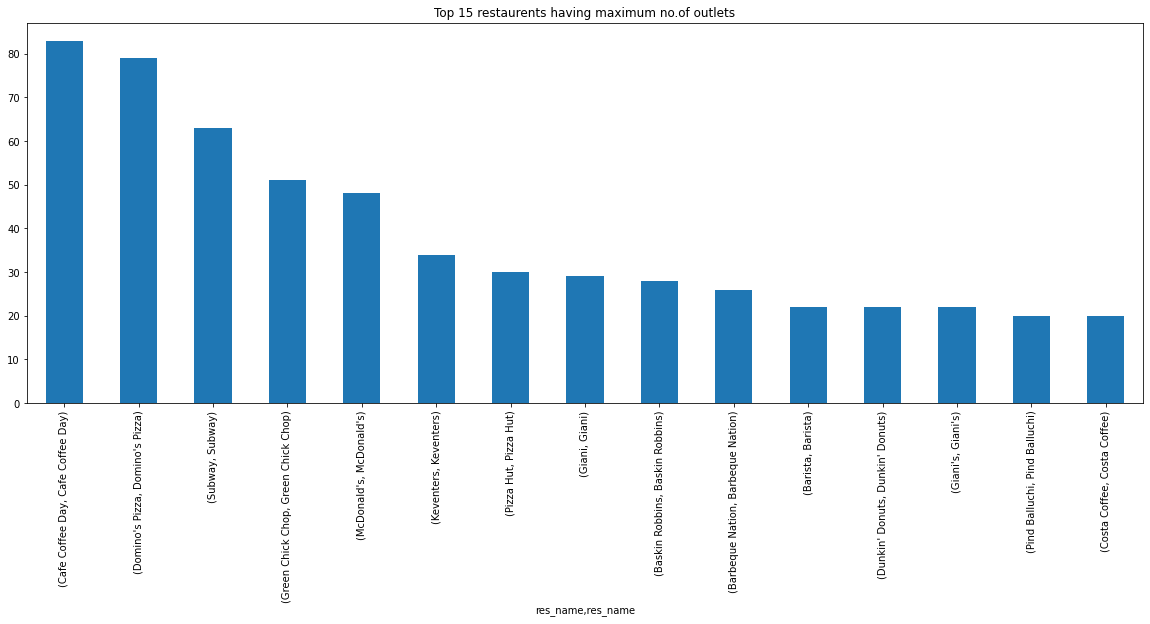

In [57]:
df.groupby('res_name')['res_name'].value_counts().sort_values(ascending=False).head(15).plot(kind='bar',figsize=(20,7),title='Top 15 restaurents having maximum no.of outlets')

<h2>2.Histogram of aggregrate rating of restaurents</h2>

<AxesSubplot:title={'center':'Aggregrate Rating of restaurents( zero ratings excluded)'}, ylabel='Frequency'>

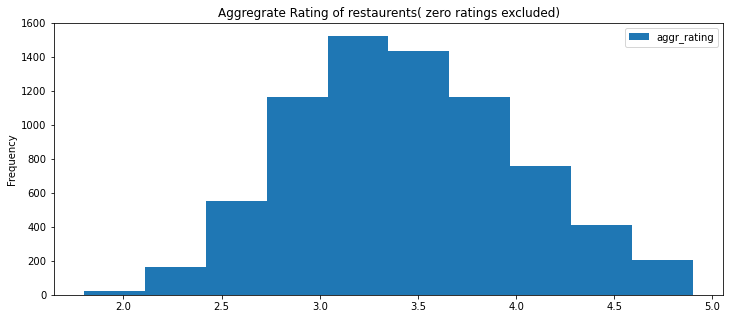

In [58]:
res_zero_rate = df[['res_name','aggr_rating']][df['aggr_rating']!=0.0].plot(kind='hist',figsize=(12,5),title="Aggregrate Rating of restaurents( zero ratings excluded)",label=['Ratings','Frequency'])
res_zero_rate

<h3>3.Top 10 restaurents having highest number of votes</h3>

<BarContainer object of 10 artists>

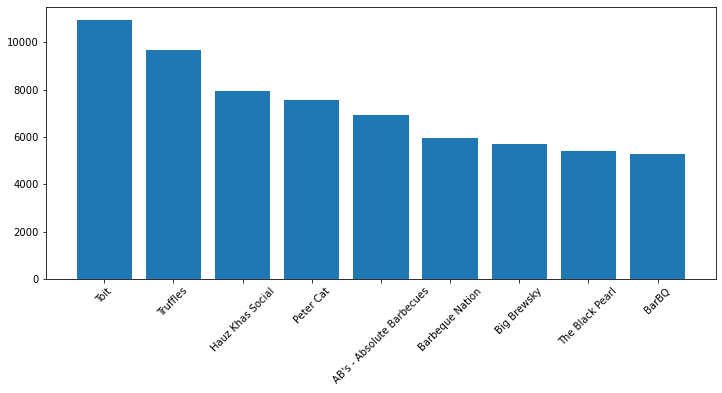

In [65]:



#df['Votes_count']=df['Votes'].value_counts().sort_values(ascending=False)


max_vote = df.sort_values(by=['Votes'],ascending=False).head(10)
#max_vote[['res_name','Votes']].plot(kind='bar',figsize=(12,5))
m.figure(figsize=(12,5))
m.xticks(rotation=45)
m.bar(height=max_vote['Votes'],x=max_vote['res_name'])
#max_vote[['res_name','Votes_count']].plot(kind='bar',figsize=(12,5),color='g',xlabel=max_vote.res_name,rot=90)

<h2> 4.Top 10 Cuisines in the USA</h2>

In [ ]:
df_usa = df[df['country_code']==216]
df_usa

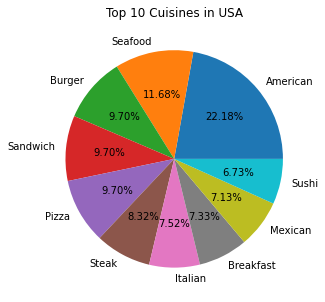

In [64]:
us_cuisines ={}
for i in df_usa['Cuisines']:
    i = str(i)
    array = i.strip().split(',')
    for a in array:
        if a.strip() in us_cuisines:
            us_cuisines[a.strip()]+=1
        else:
            us_cuisines[a.strip()]=1
            
sorted_values=sorted(us_cuisines,key=us_cuisines.get,reverse=True)[0:10]

array_size=[]
for i in sorted_values:
    array_size.append(us_cuisines[i])
    
m.figure(figsize=(17,5))
m.pie(array_size,labels=sorted_values,autopct='%0.2f%%')
m.title("Top 10 Cuisines in USA")
m.show()

<h2>4.Bubble graph of No. of restaurents present in the city of india and keeping the weighted avg of the city in a bubble</h2>

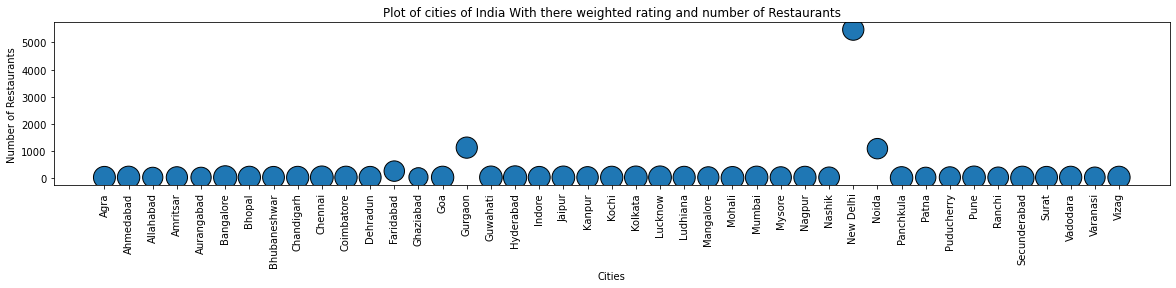

In [72]:
# finding the different cities present in india
city_grouped=df[df['country_code']==1].groupby('City')
cities=[]
num_restaurants=[]
weighted_rating=[]
# Creating different arrays from df
for key,item in city_grouped:
    #finding weighted restaurent rating
    total_votes=item['Votes'].sum()
    w=(item['Votes']*item['aggr_rating']).sum()
    ans=w/total_votes
    weighted_rating.append(ans)
    num_restaurants.append(len(item))
    cities.append(key)
# plotting the graph
m.figure(figsize=(20,3))
weighted_rating=np.array(weighted_rating)
# Increasing values of Weighted rating for visibility of Bubbles
m.title("Plot of cities of India With there weighted rating and number of Restaurants")
m.scatter(cities, num_restaurants,s=weighted_rating*120,edgecolor='black')
m.xticks(rotation=90)
m.xlabel('Cities')
m.ylabel('Number of Restaurants')
m.show() 
    

In [ ]:
cities

In [ ]:
df.columns